In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load Data

In [2]:
gr = pd.read_csv('gr_metadata_sample.csv')
am = pd.read_csv('am_metadata_sample.csv')
am_gr = pd.merge(gr[['asin', 'average_rating']], 
                 am[['asin', 'average', 'rating_count', 'text_reviews_count', 'rank', 'verifiedTrue_count', 'Format',
                     'am_countText_before', 'am_countText_after']], how='inner', on='asin')
am_gr

,asin,average_rating,average,rating_count,text_reviews_count,rank,verifiedTrue_count,Format,am_countText_before,am_countText_after
0,000100039X,4.23,4.64,1453,1453,1810945,1130,NaN,69909,31772
1,0001053655,4.08,4.48,50,50,9799161,43,"Kindle Edition, Paperback, Hardcover, Audi...",4888,2240
2,0001061240,4.62,4.87,45,45,321557,30,Hardcover,3085,1326
3,000161102X,3.86,4.35,17,17,1542999,13,NaN,788,399
4,0001711296,4.29,4.44,107,107,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574
...,...,...,...,...,...,...,...,...,...,...
4953,006078671X,4.12,4.42,130,130,481370,86,"Mass Market Paperback, Kindle Edition, Pape...",12432,5960
4954,0060786744,4.02,4.15,127,127,1960642,88,"Mass Market Paperback, Kindle Edition, Pape...",10189,4882
4955,0060786841,4.37,4.49,282,281,44459,243,"Kindle Edition, Paperback, Hardcover",14086,6675
4956,0060787031,3.82,4.54,26,26,1411080,15,"Kindle Edition, Paperback",2006,891


In [3]:
am_gr = am_gr.rename(columns={'average_rating':'gr_rating', 'average':'am_rating'})
am_gr['rating_diff'] = am_gr['am_rating'] - am_gr['gr_rating']
am_gr.columns

Index(['asin', 'gr_rating', 'am_rating', 'rating_count', 'text_reviews_count',
       'rank', 'verifiedTrue_count', 'Format', 'am_countText_before',
       'am_countText_after', 'rating_diff'],
      dtype='object')

In [4]:
lda_mallet = pd.read_csv('am_LDA_sample.csv')
lda_mallet = pd.merge(lda_mallet, am_gr, on='asin', how='inner')
lda_mallet

,asin,prop_topic_1,prop_topic_2,prop_topic_3,prop_topic_4,prop_topic_5,prop_topic_6,prop_topic_7,prop_topic_8,prop_topic_9,...,gr_rating,am_rating,rating_count,text_reviews_count,rank,verifiedTrue_count,Format,am_countText_before,am_countText_after,rating_diff
0,0001713353,0.019956,0.018601,0.010717,0.021434,0.034368,0.021557,0.014412,0.055802,0.009485,...,4.27,4.83,54,54,1461315,36,"Paperback, Hardcover",2362,1037,0.56
1,0001061240,0.027040,0.012488,0.089381,0.029990,0.009145,0.024877,0.008850,0.013176,0.013176,...,4.62,4.87,45,45,321557,30,Hardcover,3085,1326,0.25
2,0001711296,0.009414,0.011768,0.015709,0.049973,0.029940,0.024302,0.011494,0.018774,0.007718,...,4.29,4.44,107,107,2884610,69,"Library Binding, VHS Tape, Paperback, Hard...",5667,2574,0.15
3,0002007649,0.003491,0.006039,0.009483,0.014768,0.444114,0.009672,0.006511,0.004293,0.009247,...,3.57,3.37,19,19,9799524,3,"Kindle Edition, Paperback, Hardcover",5668,2810,-0.20
4,0001716069,0.015018,0.023002,0.013117,0.044958,0.027849,0.011691,0.012071,0.035168,0.037259,...,3.82,4.61,59,59,3841172,44,"Kindle Edition, Paperback, Hardcover",3081,1457,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0060753382,0.043827,0.019342,0.069033,0.017901,0.017901,0.029321,0.026337,0.041255,0.046193,...,4.38,4.73,22,22,1120118,18,Hardcover,2555,1322,0.35
4954,0060779381,0.455593,0.176829,0.005851,0.027039,0.005851,0.099593,0.007329,0.021495,0.005543,...,3.84,4.36,28,28,2869618,10,"Mass Market Paperback, Kindle Edition",4857,2200,0.52
4955,0060783400,0.015994,0.013841,0.145867,0.018147,0.178393,0.016917,0.450980,0.012611,0.016378,...,3.82,4.23,22,22,351889,13,"Kindle Edition, Paperback, Hardcover",3496,1709,0.41
4956,0060784563,0.014473,0.020997,0.006781,0.273875,0.100712,0.147806,0.012194,0.005783,0.011111,...,3.71,4.26,211,211,418728,172,"Kindle Edition, Unknown Binding, Audio CD, ...",11055,5043,0.55


# Random Forest

In [5]:
y = np.array(lda_mallet['rating_diff'])
x = lda_mallet.drop('asin', axis=1).drop('gr_rating', axis=1).drop('Format', axis=1).drop('rating_diff', axis=1)
x = np.array(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1155, min_samples_split = 35, min_samples_leaf = 3, max_leaf_nodes = 7000,
                           max_features = 'auto', max_depth = 30, bootstrap = True, n_jobs=4)
rf.fit(x_train, y_train)

# Use the forest's predict method on the train data
predictions = rf.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_train, predictions))
print('Mean Squared Error:', mean_squared_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, predictions)))
r2 = rf.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

print('----------------------------------')

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))
r2 = rf.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

TRAIN DATA:
Mean Absolute Error: 0.12553367115927463
Mean Squared Error: 0.02837558669137616
Root Mean Squared Error: 0.16845054672329252
R2 Adjusted Score: 0.766725072437243
----------------------------------
TEST DATA:
Mean Absolute Error: 0.16114766796503652
Mean Squared Error: 0.04454593077905496
Root Mean Squared Error: 0.2110590694072514
R2 Adjusted Score: 0.5902558785964602


# Xgboost

In [7]:
y = np.array(lda_mallet['rating_diff'])
x = lda_mallet.drop('asin', axis=1).drop(['rating_diff', 'Format', 'gr_rating'], axis=1)
features = list(x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

# fit model no training data
model = xgb.XGBRegressor(eta=0.1, min_child_weight=10, tree_method='approx')
model.fit(x_train, y_train)

# make predictions for train data
y_pred = model.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = model.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

print('----------------------------------')

# make predictions for test data
y_pred = model.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = model.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

TRAIN DATA:
Mean Absolute Error: 0.09621765583288676
Mean Squared Error: 0.0161926223546991
Root Mean Squared Error: 0.1272502351852408
R2 Adjusted Score: 0.8668808913828905
----------------------------------
TEST DATA:
Mean Absolute Error: 0.16101430723455645
Mean Squared Error: 0.04470921191046834
Root Mean Squared Error: 0.21144552941707787
R2 Adjusted Score: 0.5887539797122594


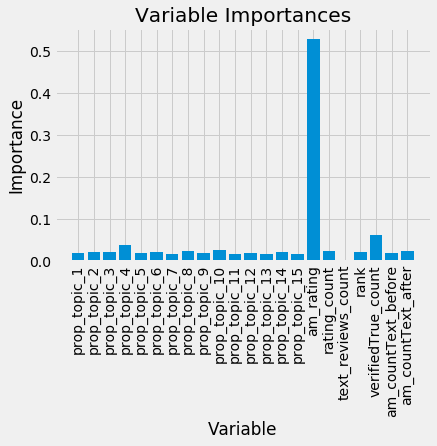

In [8]:
importances = list(model.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()

# Neural Network

In [10]:
y = np.array(lda_mallet['rating_diff'])
x = lda_mallet.drop('asin', axis=1).drop('rating_diff', axis=1).drop('Format', axis=1).drop('gr_rating', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)
# normalize features
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
# fit model no training data
model = MLPRegressor(hidden_layer_sizes=(14,), solver='lbfgs', alpha=0.002, max_iter=500)
model.fit(x_train, y_train)

# make predictions for train data
y_pred = model.predict(x_train)
print('TRAIN DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = model.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

print('----------------------------------')

# make predictions for test data
y_pred = model.predict(x_test)
print('TEST DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = model.score(x_test, y_test)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

TRAIN DATA:
Mean Absolute Error: 0.15196694403469885
Mean Squared Error: 0.040257383982830554
Root Mean Squared Error: 0.20064242817218533
R2 Adjusted Score: 0.6690451395912462
----------------------------------
TEST DATA:
Mean Absolute Error: 0.16632795512240564
Mean Squared Error: 0.04710177296554759
Root Mean Squared Error: 0.21702942880067577
R2 Adjusted Score: 0.5667466311111002


C:\Users\Tu Lam\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Best Models

Conclusion: Even better than XGB for model that predicts from both GR & AM!!!

# Ensemble

In [13]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((33*model1_pred) + (34*model2_pred) + (33*model3_pred))/100
print('TRAIN DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((33*model1_pred) + (34*model2_pred) + (33*model3_pred))/100
print('TEST DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

TRAIN DATA:
Mean Absolute Error: 0.12073867144188799
Mean Squared Error: 0.025505372263599963
Root Mean Squared Error: 0.15970401455066796
R2 Adjusted Score: 0.790321027298418
----------------------------------
TEST DATA:
Mean Absolute Error: 0.15746916865051494
Mean Squared Error: 0.043175131580105164
Root Mean Squared Error: 0.20778626417572738
R2 Adjusted Score: 0.6028648173608165


##### Voting w/ weights

In [12]:
# make predictions for train data
model1_pred = np.array(model1.predict(x_train))
model2_pred = np.array(model2.predict(x_train))
model3_pred = np.array(model3.predict(x_train_nn))
y_pred = ((25*model1_pred) + (38*model2_pred) + (37*model3_pred))/100
print('TRAIN DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = r2_score(y_train, y_pred)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

print('----------------------------------')

# make predictions for test data
model1_pred = np.array(model1.predict(x_test))
model2_pred = np.array(model2.predict(x_test))
model3_pred = np.array(model3.predict(x_test_nn))
y_pred = ((25*model1_pred) + (38*model2_pred) + (37*model3_pred))/100
print('TEST DATA:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R2 Adjusted Score:', adjusted_r2)

TRAIN DATA:
Mean Absolute Error: 0.12063188750240274
Mean Squared Error: 0.02537626792389121
Root Mean Squared Error: 0.1592993029610965
R2 Adjusted Score: 0.791382390568935
----------------------------------
TEST DATA:
Mean Absolute Error: 0.15749994828207342
Mean Squared Error: 0.043218199365830046
Root Mean Squared Error: 0.20788987316805513
R2 Adjusted Score: 0.6024686695710182
